In [1]:
import random
random.seed(1) 


In [2]:
class State:
    def __init__(self, dealer_card, player_card, is_terminal=False):
        """
        :type self.is_terminal: bool
        :type self.dealer: int
        :type self.player: int
        """
        self.dealer = dealer_card.value
        self.player = player_card.value
        self.term = is_terminal

In [3]:
class Card:
    def __init__(self, force_black=False):
        """
        :type self.value: int
        """

        self.value = random.randint(1,10)
        self.absolute_value = self.value
        if force_black or random.randint(1,3) != 1:
            self.is_black = True
        else:
            self.is_black = False
            self.value = 0 - self.value
        self.is_red = not self.is_black

In [4]:
from enum import Enum
class Actions(Enum):

    # Possible actions
    hit = 0
    stick = 1

    @staticmethod
    def get_action(n):
        return Actions.hit if n==0 else Actions.stick

In [5]:
def step(s, a):
    next_s = s
    r = 0
    if a == Actions.stick:
        while not next_s.term:
            next_s.dealer += Card().value
            if next_s.dealer < 1 or next_s.dealer > 21:
                next_s.term = True
                r = 1
            elif next_s.dealer >= 17:
                next_s.term = True
                if next_s.dealer > next_s.player:
                    r = -1
                elif next_s.dealer < next_s.player:
                    r = 1
    else:
        next_s.player += Card().value
        if next_s.player < 1 or next_s.player > 21:
            next_s.term = True
            r = -1
    return next_s, r

In [6]:
s = State(Card(True),Card(True))
a = Actions.hit

while not s.term:
    # print ("state = %d, %d" % (s.player, s.dealer, s.term))
    print ("state = %s, %s" % (s.player, s.dealer))
    if s.player >= 17:
        a = Actions.stick
    s, r = step(s, a)

print "reward = %d" % (r)

state = 9, 2
state = 1, 2
state = 6, 2
state = 13, 2
state = 12, 2
state = 21, 2
reward = 1


In [7]:
def play():
    s = State(Card(True),Card(True))
    a = Actions.hit
    
    while not s.term:
        # print ("state = %d, %d" % (s.player, s.dealer, s.term))
        if s.player >= 14 or s.player < 9:
            a = Actions.stick
        s, r = step(s, a)
    return r

In [8]:
r = 0
for i in xrange(0,100000):
    r += play()

print "r = %s" % (round(1.0*r/i,2))

r = 0.06


### Test; Each draw from the deck results in a value between 1 and 10 (uniformly distributed)

<IPython.core.display.Javascript object>


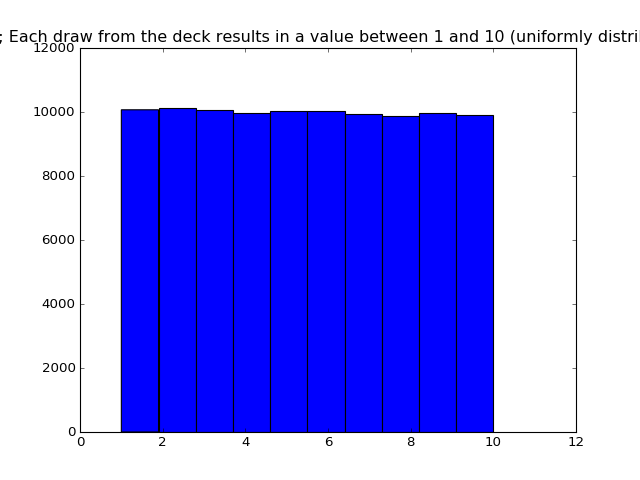

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(1)

values = []
for i in xrange(0,100000):
    values.append(Card().absolute_value)
    # values.append(random.randint(1,10))

plt.title('Test; Each draw from the deck results in a value between 1 and 10 (uniformly distributed)')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
plt.savefig("#1-test1.png")

In [311]:
# from IPython.display import Image
# Image(url="test.png")

### Each draw from the deck results in a colour of red (probability 1/3) or black (probability 2/3).

<IPython.core.display.Javascript object>


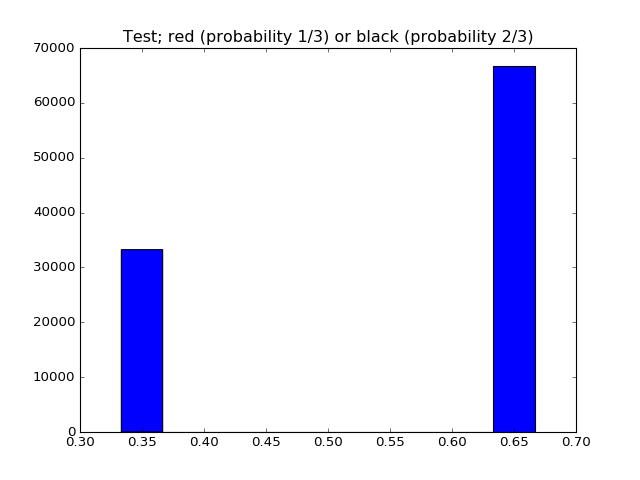

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(2)

values = []
for i in xrange(0,100000):
    if (Card().is_black):
        values.append(0.6666666)
    else:
        values.append(0.3333333)

plt.title('Test; red (probability 1/3) or black (probability 2/3)')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
plt.savefig("#1-test2.png")

### Test: If the player’s sum exceeds 21, or becomes less than 1, then she “goes bust” and loses the game (reward -1)

In [11]:
def play_test_player_bust():
    s = State(Card(True),Card(True))
    a = Actions.hit
    
    while not s.term:
        s, r = step(s, a)
        # print ("state = %s, %s, %s" % (s.player, s.dealer, s.term))
    return s, r

<IPython.core.display.Javascript object>


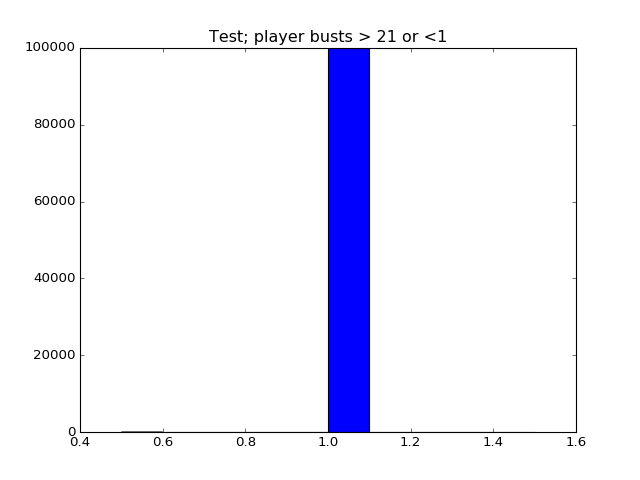

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(3)

values = []
for i in xrange(0,100000):
    s, r = play_test_player_bust()
    if s.player > 21:
        values.append(1)
    elif s.player < 1:
        values.append(1)
    else:
        values.append(-1)
        print "error!!!!"
    

plt.title('Test; player busts > 21 or <1')
plt.hist(values)
  
         # , c='g', s=20, alpha=0.25, label='true positive')
plt.show()
plt.savefig("#1-test3.png")

### Test: If the player sticks then the dealer starts taking turns. The dealer always sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome – win (reward +1), lose (reward -1), or draw (reward 0) – is the player with the largest sum.

In [13]:
def play_test_player_stick():
    s = State(Card(True),Card(True))
    a = Actions.hit
    
    a = Actions.stick
    while not s.term:
        s, r = step(s, a)
        # print ("state = %s, %s, %s" % (s.player, s.dealer, s.term))
    return s, r

<IPython.core.display.Javascript object>


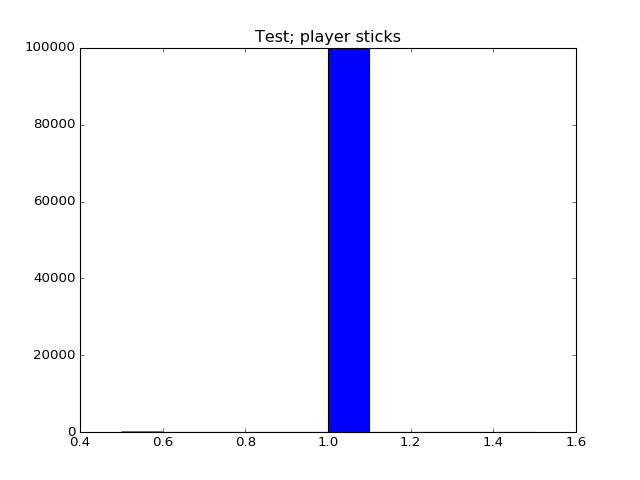

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure(4)

values = []
for i in xrange(0,100000):
    s, r = play_test_player_stick()
    if s.dealer > 21 or s.dealer < 1:
        if r == 1:
            values.append(1)
        else:
            print "error, player should have won"
            print ("state = %s, %s, %s. result = %s" % (s.player, s.dealer, s.term, r))
            values.append(-1)
    elif s.player == s.dealer:
        if r == 0:
            values.append(1)
        else:
            print "error, player should have drawn"
            print ("state = %s, %s, %s. result = %s" % (s.player, s.dealer, s.term, r))
            values.append(-2)
    elif s.player > s.dealer:
        if r == 1:
            values.append(1)
        else:
            print "error, player should have won"
            print ("state = %s, %s, %s. result = %s" % (s.player, s.dealer, s.term, r))
            values.append(-3)
    elif s.player < s.dealer:
        if r == -1:
            values.append(1)
        else:
            print "error, player should have lost"
            print ("state = %s, %s, %s. result = %s" % (s.player, s.dealer, s.term, r))
            values.append(-4)
    else:
        print "all cases should have been dealt with"
        print ("state = %s, %s, %s. result = %s" % (s.player, s.dealer, s.term, r))
        values.append(-5)

    

plt.title('Test; player sticks')
plt.hist(values)
plt.show()
plt.savefig("#1-test4.png")